In [ ]:
# Peception Model
import tensorflow
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install bdgenomics.adam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bdgenomics.adam: filename=bdgenomics.adam-1.0-py3-none-any.whl size=57117700 sha256=2a26f140b05b333ade91f0d9fb40c6af87b3e8b45c72c267276822665da68fab
  Stored in directory: /root/.cache/pip/wheels/79/e0/d9/2445935906b70530e78ccda24bd94479b3355975d379365321
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=155bbdaf3bc479b87261b0ac57bbc9d1eb6d8398304976c61471caea875d7bfb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built bdgenomics.adam pyspark


In [ ]:
x = [29,89,46,90,45,60,78]
y = [67,56,35,67,99,86,56]

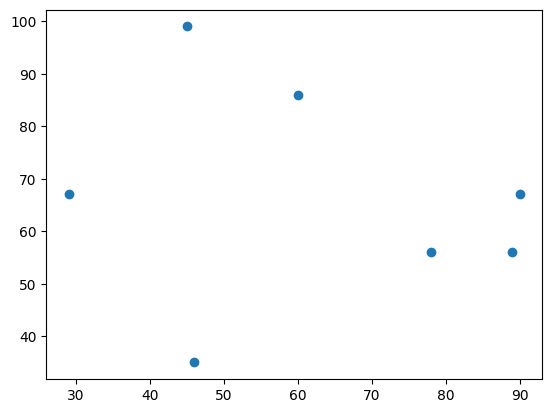

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
model = Sequential()
#input layer
model.add(Dense(1,input_dim = 1,activation = 'linear'))
#output layer
model.add(Dense(1,activation = 'linear'))
model.compile(Adam(learning_rate = 0.01),loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x,y,epochs = 10,verbose = 1)

Epoch 1/10
1/1 [==============================] - 1s 580ms/step - loss: 1416.3591
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 1354.8561
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 1299.1887
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 1249.2985
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 1205.0892
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 1166.4187
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 1133.0975
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 1104.8866
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 1081.4955
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 1062.5839


In [ ]:
model.predict(x)

1/1 [==============================] - 0s 142ms/step


array([[29.188604],
       [90.02125 ],
       [46.42452 ],
       [91.035126],
       [45.41064 ],
       [60.6188  ],
       [78.8686  ]], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
adv = pd.read_csv(r"/content/advertising.csv")
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#data cleaning
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
adv.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

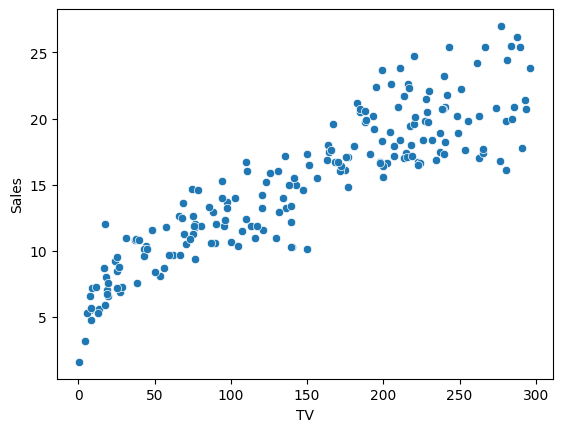

In [ ]:
#Data Analysis
sns.scatterplot(x=adv.TV , y=adv.Sales)
plt.show()

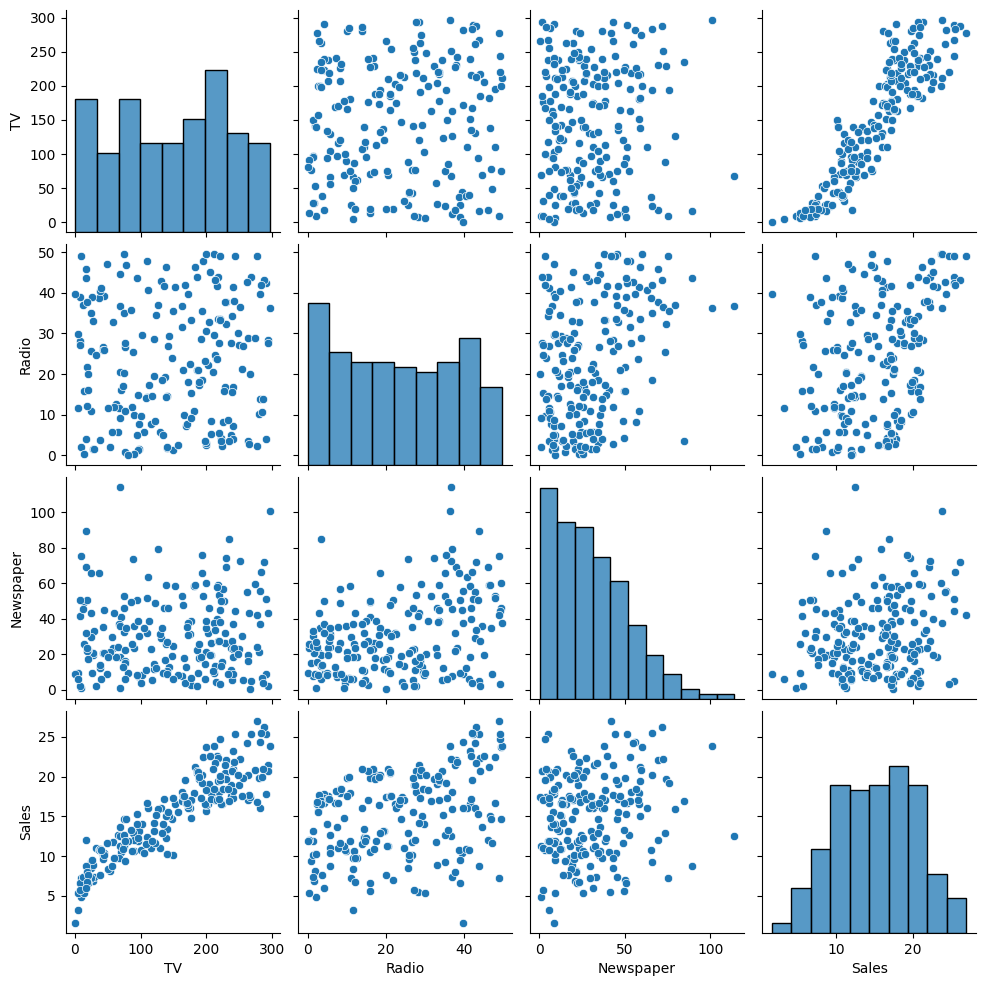

In [ ]:
sns.pairplot(adv)
plt.show()

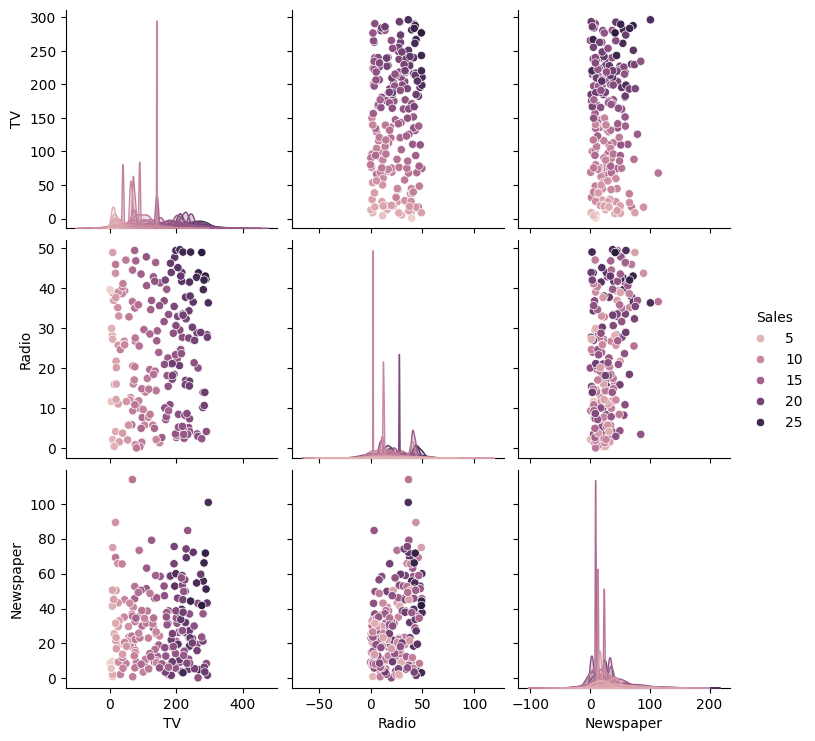

In [ ]:
sns.pairplot(adv,hue='Sales')
plt.show()

In [ ]:
ip = adv.drop('Sales',axis=1)
op = adv.Sales

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
#Model Training
model = Sequential()
#Input and first hidden layer
model.add(Dense(30,input_dim=3,activation='relu'))
#second hidden layer
model.add(Dense(15,activation='linear'))
model.add(Dense(10,activation='linear'))
#Output Layer
model.add(Dense(1,activation='linear'))
model.compile(Adam(learning_rate=0.01),loss='mse')

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)


Epoch 1/20
5/5 [==============================] - 2s 77ms/step - loss: 225.2367 - val_loss: 190.5086
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 133.9073 - val_loss: 71.6401
Epoch 3/20
5/5 [==============================] - 0s 20ms/step - loss: 36.0578 - val_loss: 29.2613
Epoch 4/20
5/5 [==============================] - 0s 19ms/step - loss: 37.2899 - val_loss: 18.6742
Epoch 5/20
5/5 [==============================] - 0s 32ms/step - loss: 17.0266 - val_loss: 20.1159
Epoch 6/20
5/5 [==============================] - 0s 27ms/step - loss: 18.6439 - val_loss: 21.8097
Epoch 7/20
5/5 [==============================] - 0s 26ms/step - loss: 14.1309 - val_loss: 12.2518
Epoch 8/20
5/5 [==============================] - 0s 23ms/step - loss: 11.6511 - val_loss: 12.0589
Epoch 9/20
5/5 [==============================] - 0s 17ms/step - loss: 10.5821 - val_loss: 9.8773
Epoch 10/20
5/5 [==============================] - 0s 33ms/step - loss: 8.3106 - val_loss: 10.9519
Epoch 11

In [ ]:
pred = model.predict(x_test)
pred

2/2 [==============================] - 0s 8ms/step


array([[21.033314 ],
       [26.010702 ],
       [10.067601 ],
       [11.01428  ],
       [22.816896 ],
       [20.980997 ],
       [17.956549 ],
       [20.869608 ],
       [10.017537 ],
       [ 8.913516 ],
       [ 9.681993 ],
       [ 9.549519 ],
       [20.651293 ],
       [15.2803755],
       [12.0490885],
       [21.255344 ],
       [12.890336 ],
       [ 7.891264 ],
       [18.501505 ],
       [ 8.031773 ],
       [ 9.41839  ],
       [ 9.156821 ],
       [ 7.9468555],
       [22.015446 ],
       [18.553862 ],
       [10.059433 ],
       [15.343355 ],
       [17.722637 ],
       [12.126177 ],
       [18.601269 ],
       [14.657371 ],
       [21.7669   ],
       [17.675192 ],
       [15.487528 ],
       [16.221504 ],
       [ 9.234813 ],
       [15.998248 ],
       [16.952774 ],
       [19.903593 ],
       [15.605969 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print('MSE :',mse)
print('R2 Score :',r2)

MSE : 5.528692198551339
R2 Score : 0.7784736882606331


# MNIST Dataset using ANN

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import random
random.seed(0)

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [1]:
x_train

NameError: name 'x_train' is not defined

In [2]:
set(y_train)

NameError: name 'y_train' is not defined

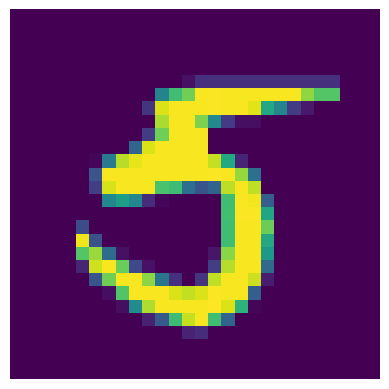

In [ ]:
plt.imshow(x_train[y_train==5][500])#here 500 is the index number
plt.axis('off')
plt.show()

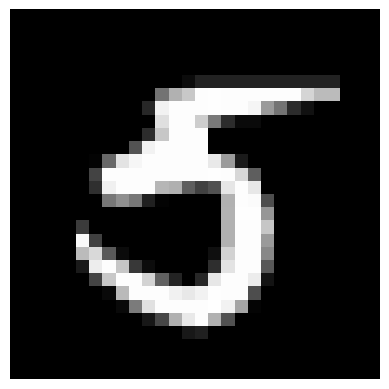

In [ ]:
plt.imshow(x_train[y_train==5][500],cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
for i in range(0,10):
  print(i,':',len(x_train[y_train==i])) #here we can the number of images of each digits

0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


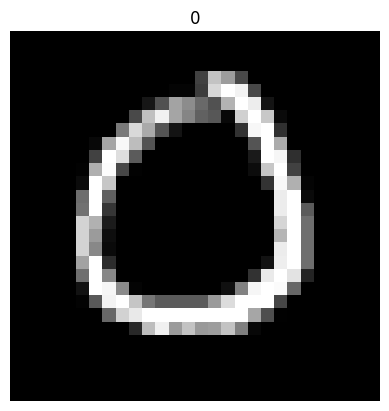

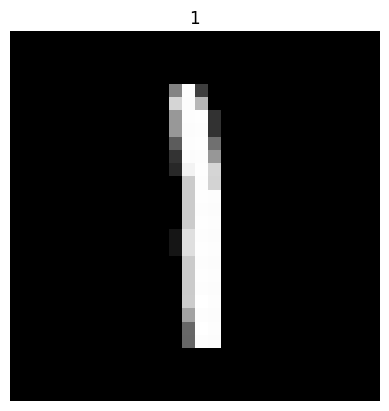

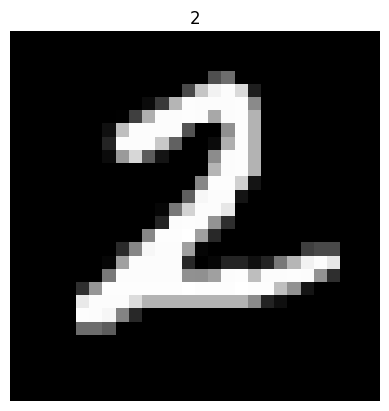

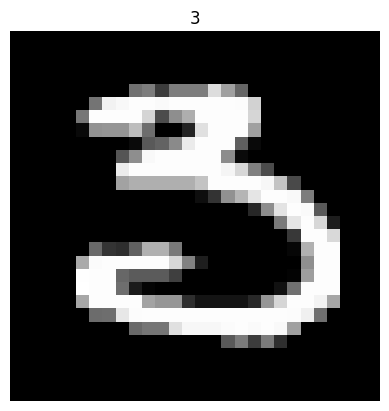

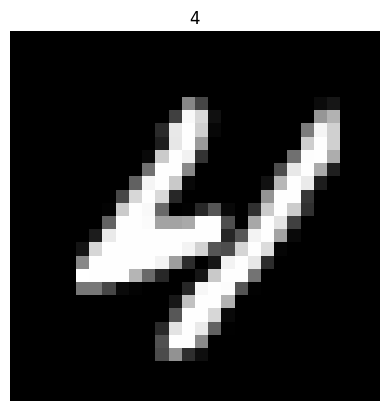

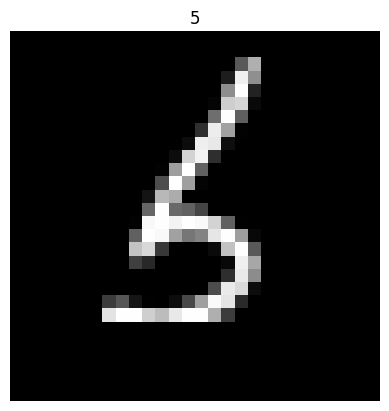

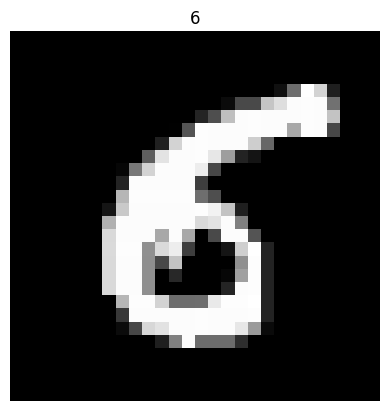

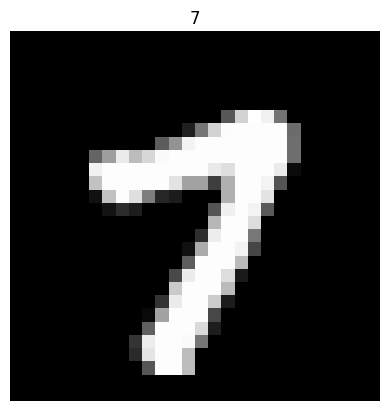

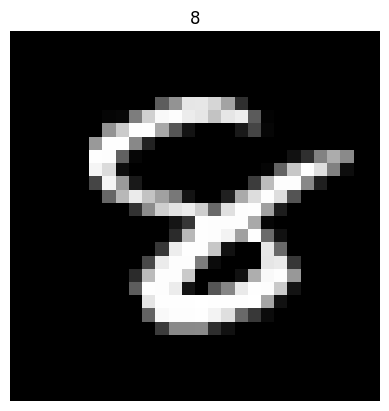

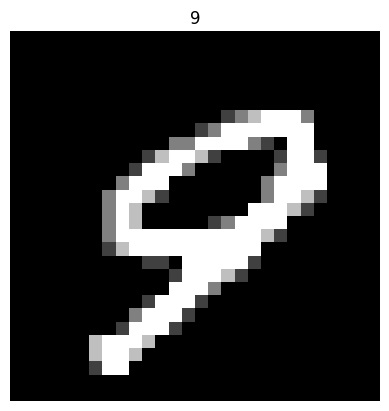

In [ ]:
for i in range(0,10):
  plt.imshow(x_train[y_train==i][np.random.randint(0,5000)],cmap='gray')
  plt.title(str(i))
  plt.axis('off')
  plt.show()

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model = Sequential()
#input layer
model.add(Dense(10,input_dim=784,activation='relu'))
#hidden layer
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))
model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 dense_15 (Dense)            (None, 10)                160       
                                                                 
Total params: 8805 (34.39 KB)
Trainable params: 8805 (34.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = model.fit(x_train,y_train,validation_split=0.1,epochs=15)

Epoch 1/15
1688/1688 [==============================] - 5s 2ms/step - loss: 0.4665 - accuracy: 0.8565 - val_loss: 0.2704 - val_accuracy: 0.9182
Epoch 2/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3238 - accuracy: 0.9076 - val_loss: 0.2287 - val_accuracy: 0.9353
Epoch 3/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3044 - accuracy: 0.9141 - val_loss: 0.2402 - val_accuracy: 0.9300
Epoch 4/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.9163 - val_loss: 0.2485 - val_accuracy: 0.9312
Epoch 5/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2857 - accuracy: 0.9189 - val_loss: 0.2456 - val_accuracy: 0.9323
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.9213 - val_loss: 0.2325 - val_accuracy: 0.9340
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2824 - accuracy: 0.9218 - val_loss: 0.2487 - val_accuracy: